In [57]:
import pandas as pd

input_path = 'dataset/cleaned_data_export.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((2736, 79), (2736,))

In [64]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.30, random_state=42)

for max_leaves in range(300,500):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Max leaves: {:d} Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(max_leaves, train_acc,test_acc) )

#model_decision_boundary(dt, X_test, y_test)




Max leaves: 300 Train Accuracy: 0.924 - Test Accuracy: 0.533
Max leaves: 301 Train Accuracy: 0.924 - Test Accuracy: 0.526
Max leaves: 302 Train Accuracy: 0.925 - Test Accuracy: 0.536
Max leaves: 303 Train Accuracy: 0.925 - Test Accuracy: 0.544
Max leaves: 304 Train Accuracy: 0.926 - Test Accuracy: 0.530
Max leaves: 305 Train Accuracy: 0.926 - Test Accuracy: 0.524
Max leaves: 306 Train Accuracy: 0.927 - Test Accuracy: 0.527
Max leaves: 307 Train Accuracy: 0.927 - Test Accuracy: 0.526
Max leaves: 308 Train Accuracy: 0.930 - Test Accuracy: 0.538
Max leaves: 309 Train Accuracy: 0.929 - Test Accuracy: 0.525
Max leaves: 310 Train Accuracy: 0.931 - Test Accuracy: 0.535
Max leaves: 311 Train Accuracy: 0.930 - Test Accuracy: 0.530
Max leaves: 312 Train Accuracy: 0.934 - Test Accuracy: 0.540
Max leaves: 313 Train Accuracy: 0.933 - Test Accuracy: 0.514
Max leaves: 314 Train Accuracy: 0.933 - Test Accuracy: 0.520
Max leaves: 315 Train Accuracy: 0.933 - Test Accuracy: 0.536
Max leaves: 316 Train Ac

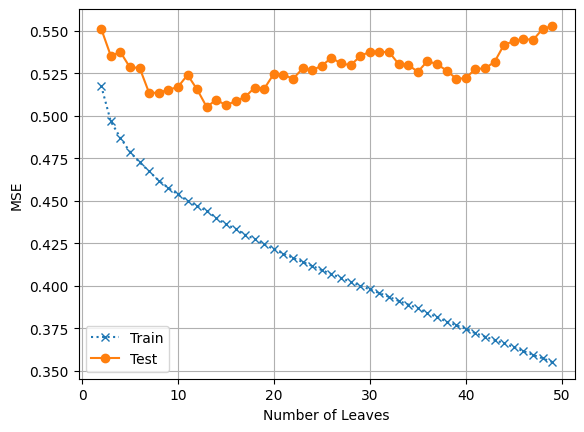

In [67]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

errors = []

for max_leaves in range(2,50):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();